In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
energies = np.load("output/energies.npy")
H = np.load("output/hamiltonian.npy")
gamma_L = np.load("output/gamma_L.npy")
gamma_R = np.load("output/gamma_R.npy")
sigma_D = np.load("output/ed/self_energy.npy")

In [10]:
print("Hamiltonian:\n", H)
eigvals, eigvecs = np.linalg.eig(H)
print("Eigenvalues:", eigvals)

Hamiltonian:
 [[-1.5   0.5   0.  ]
 [ 0.5   0.25  0.5 ]
 [ 0.    0.5   1.5 ]]
Eigenvalues: [-1.6382309   0.20384807  1.68438282]


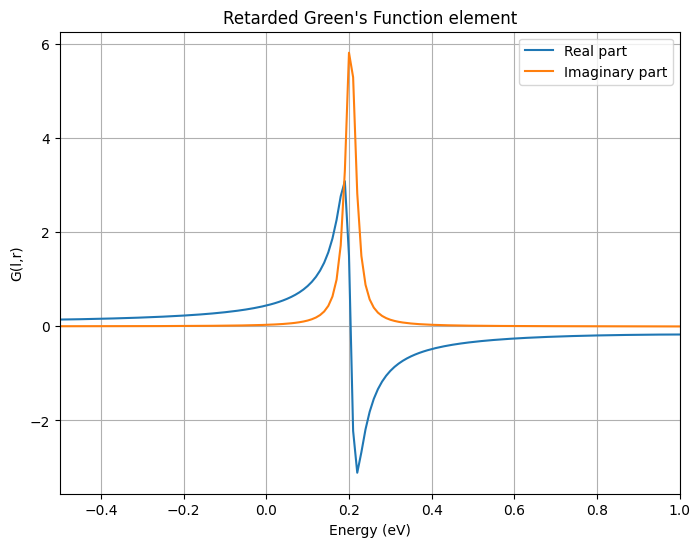

In [11]:
from pathlib import Path

g_path = Path("output") / "dft" / "G_retarded.npz"
if not g_path.exists():
    print(f"Missing {g_path}. Run the workflow with METHOD='dft' to generate it.")
else:
    data = np.load(g_path)
    E_G = data["energies"]
    G = data["G"]  # shape: (nE, n, n) complex
    idx_l, idx_r = 0, 2
    G_lr = G[:, idx_l, idx_r]

    plt.figure(figsize=(8, 6))
    plt.plot(E_G, G_lr.real, label="Real part")
    plt.plot(E_G, G_lr.imag, label="Imaginary part")
    plt.xlabel("Energy (eV)")
    plt.ylabel("G(l,r)")
    plt.title("Retarded Green's Function element")
    plt.xlim(-0.5, 1.0)
    plt.legend()
    plt.grid()
    plt.show()

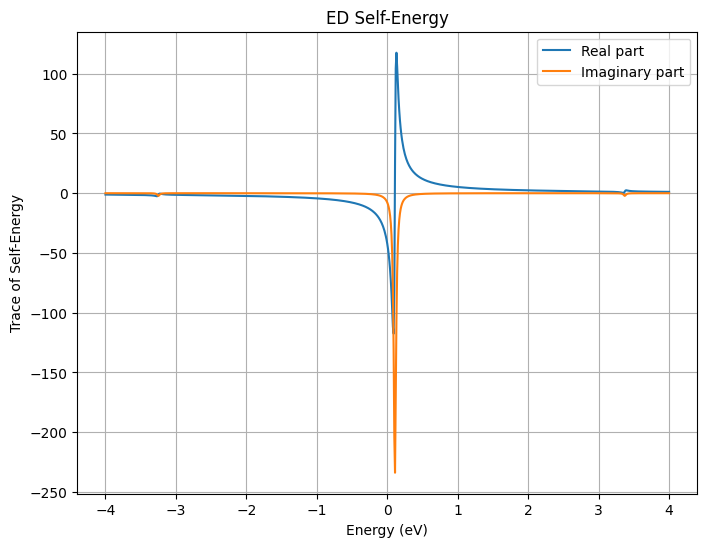

In [12]:
energies = np.load("output/energies.npy")
se = np.load("output/ed/self_energy.npy")
se_trace = np.trace(se, axis1=1, axis2=2)
plt.figure(figsize=(8, 6))
plt.plot(energies,se_trace.real, label="Real part")
plt.plot(energies,se_trace.imag, label="Imaginary part")
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of Self-Energy")
plt.title("ED Self-Energy")
plt.legend()
plt.grid()
# plt.xlim(-1.0, 1.23)
plt.show()

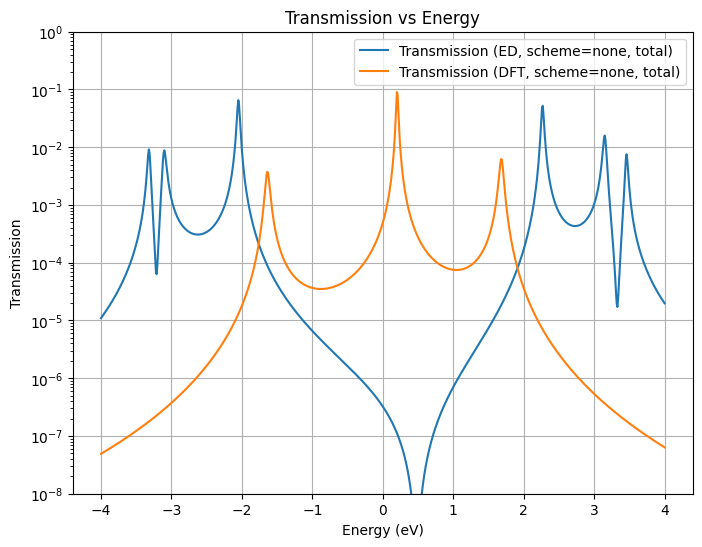

In [13]:
from pathlib import Path

def load_ET(path):
    """Load ET.npy from a scheme folder.

    Supports two formats:
      - 2 rows: (E, T_total)
      - 4 rows: (E, T_elastic, T_inelastic, T_total)
    """
    p = Path(path)
    arr = np.load(p)
    if arr.shape[0] == 2:
        E, Ttot = arr
        return E, None, None, Ttot
    if arr.shape[0] == 4:
        E, Tel, Tin, Ttot = arr
        return E, Tel, Tin, Ttot
    raise ValueError(f"Unexpected ET.npy shape {arr.shape} in {p}")


E_none, _, _, T_none = load_ET("output/ed/none/ET.npy")

# For DFT, ET.npy lives under output/dft/<scheme>/ET.npy
# (Pick the scheme folder you ran the DFT workflow with.)
DFT_SCHEME = "none"
E_dft, _, _, T_dft = load_ET(Path("output") / "dft" / DFT_SCHEME / "ET.npy")

plt.figure(figsize=(8, 6))
plt.plot(E_none, T_none, label="Transmission (ED, scheme=none, total)")
plt.plot(E_dft, T_dft, label=f"Transmission (DFT, scheme={DFT_SCHEME}, total)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

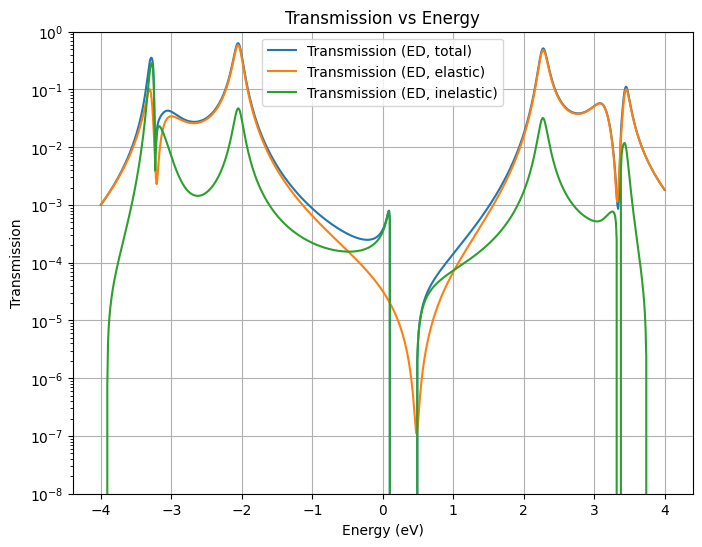

In [18]:
E, Tel, Tin_ferretti, T_ferretti = np.load("output/ed/ferretti/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E, T_ferretti, label="Transmission (ED, total)")
plt.plot(E, Tel, label="Transmission (ED, elastic)")
plt.plot(E, Tin_ferretti, label="Transmission (ED, inelastic)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

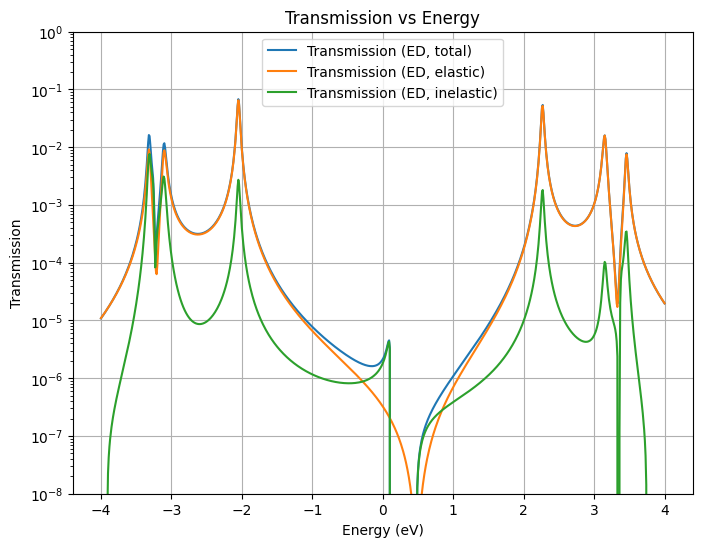

In [15]:
E, Tel, Tin_brazilian, T_brazilian = np.load("output/ed/brazilian/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E, T_brazilian, label="Transmission (ED, total)")
plt.plot(E, Tel, label="Transmission (ED, elastic)")
plt.plot(E, Tin_brazilian, label="Transmission (ED, inelastic)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

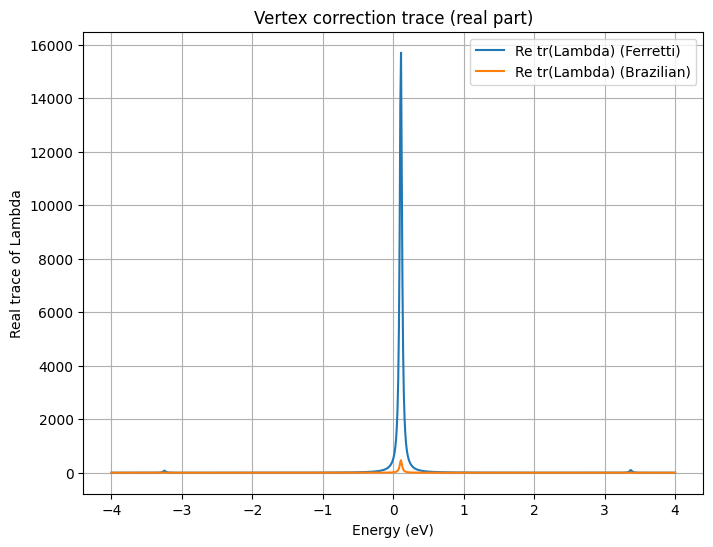

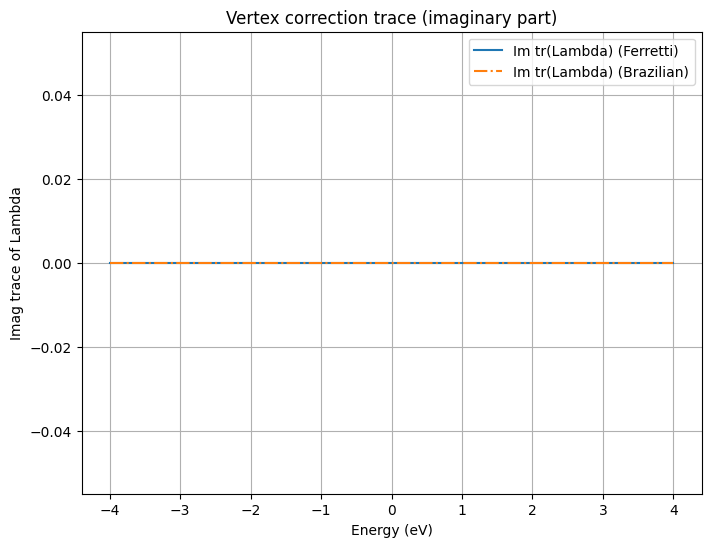

In [17]:
from pathlib import Path

def load_lambda_trace(folder):
    """Load energies and trace(Lambda) from a workflow output scheme folder."""
    p = Path(folder) / "vertex_correction.npz"
    if not p.exists():
        print(f"Missing vertex correction file (this is expected for scheme='none'): {p}")
        return None
    d = np.load(p)
    E = d["energies"]
    tr = d["trace"]
    return E, tr


data_ferretti = load_lambda_trace("output/ed/ferretti")
data_brazilian = load_lambda_trace("output/ed/brazilian")

plt.figure(figsize=(8, 6))
if data_ferretti is not None:
    E_f, tr_f = data_ferretti
    plt.plot(E_f, tr_f.real, label="Re tr(Lambda) (Ferretti)")
if data_brazilian is not None:
    E_b, tr_b = data_brazilian
    plt.plot(E_b, tr_b.real, label="Re tr(Lambda) (Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Real trace of Lambda")
plt.title("Vertex correction trace (real part)")
plt.legend()
plt.grid()

plt.figure(figsize=(8, 6))
if data_ferretti is not None:
    plt.plot(E_f, tr_f.imag, label="Im tr(Lambda) (Ferretti)")
if data_brazilian is not None:
    plt.plot(E_b, tr_b.imag, "-.", label="Im tr(Lambda) (Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Imag trace of Lambda")
plt.title("Vertex correction trace (imaginary part)")
plt.legend()
plt.grid()